# Task 1:
#### Importing needed packages and explain their uses.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,  LabelEncoder
from sklearn.svm import SVC


# NumPy: Fundamental library for numerical computations
# Pandas: Data manipulation and analysis library
# train_test_split: Split data into training and testing sets
# accuracy_score, confusion_matrix, classification_report: Evaluate model performance
# Matplotlib: Plotting library
# Seaborn: Statistical data visualization library built on top of Matplotlib
# LabelEncoder: Encode categorical variables as integers
# StandardScaler: Standardize features by removing the mean and scaling to unit variance
# SVC: Support Vector Classifier from scikit-learn


# Task 2:
* ### Importing the selected dataset:

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


* ###  Visualizing the dataset contents:

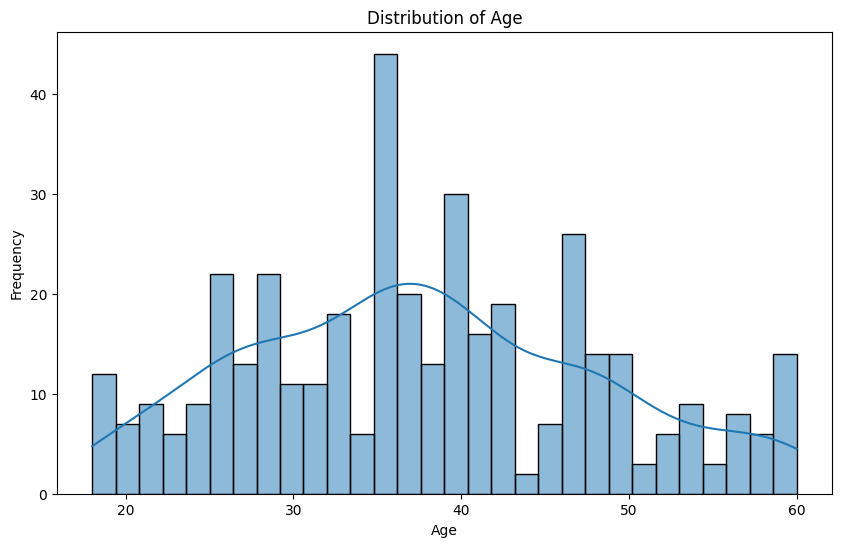

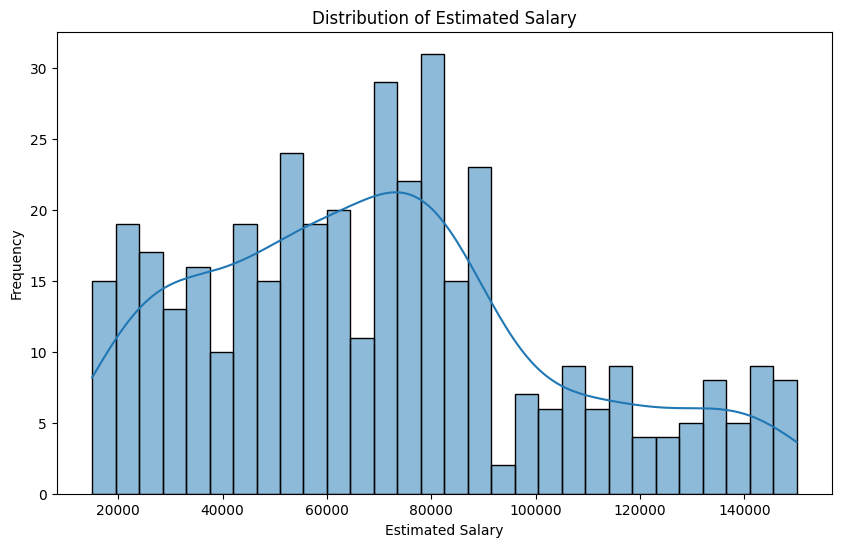

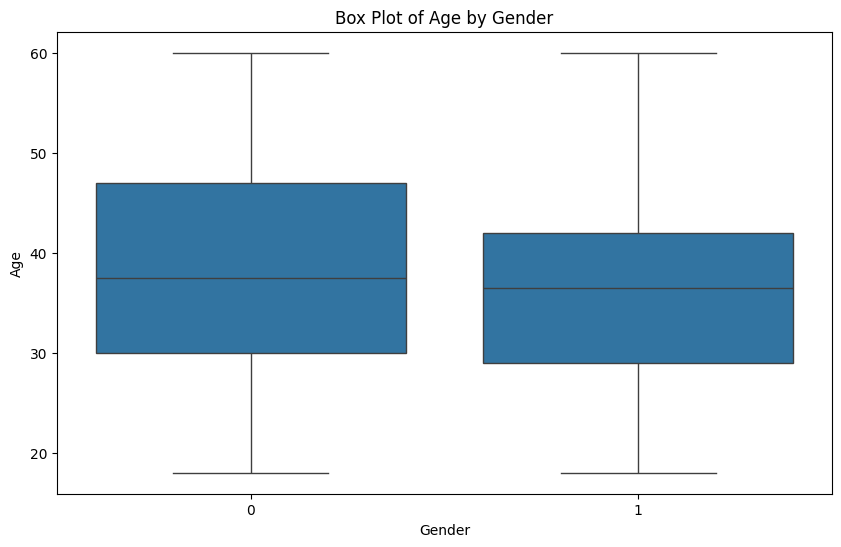

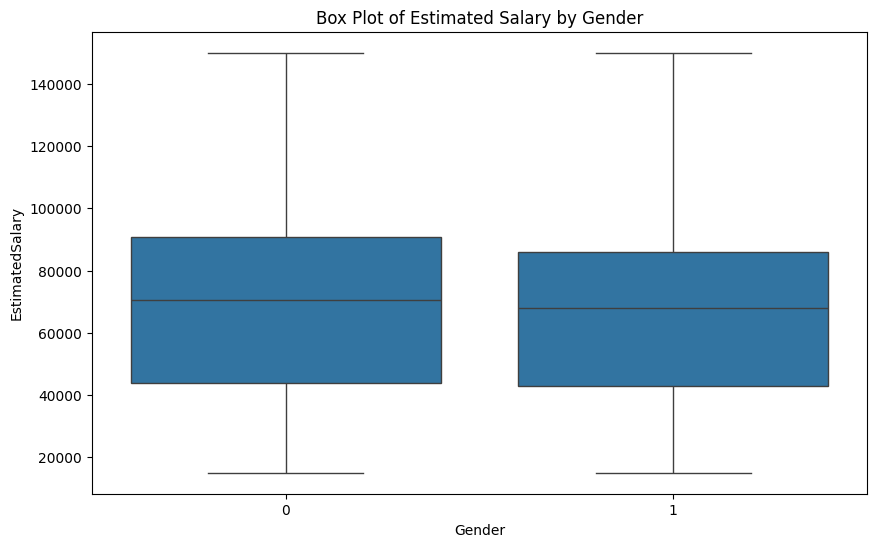

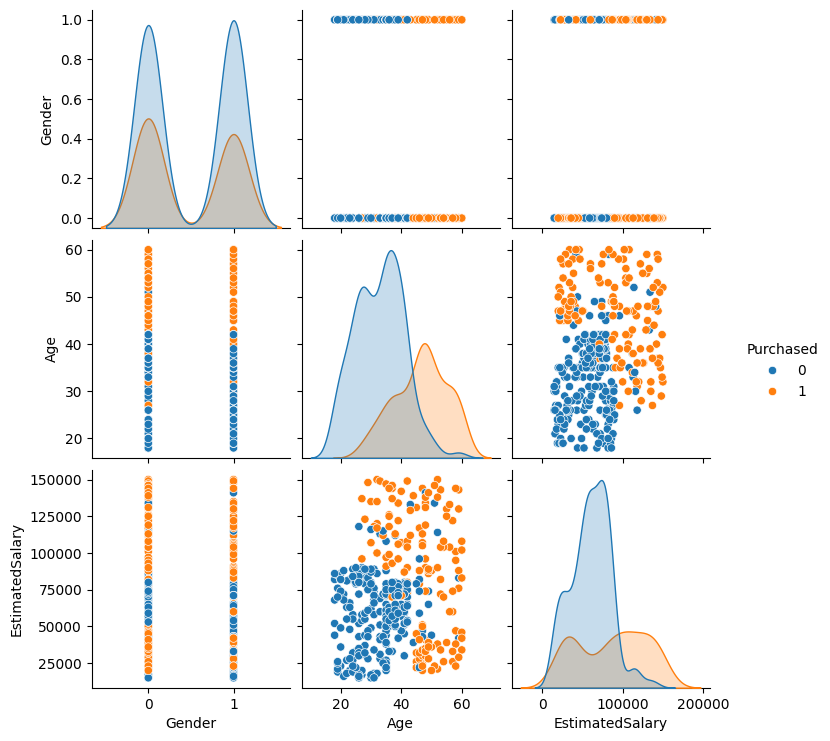

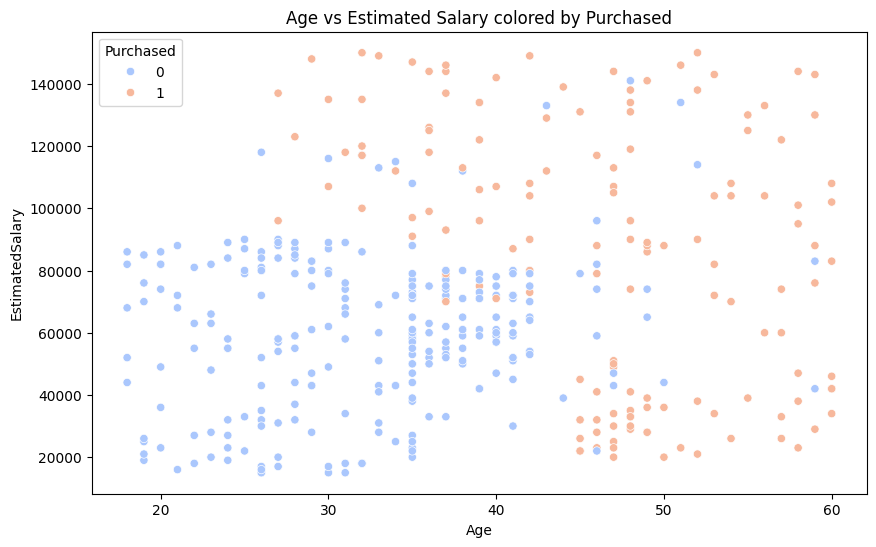

C:\Users\abode\AppData\Local\Temp\ipykernel_37404\562085313.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Purchased', data=df, palette='coolwarm')


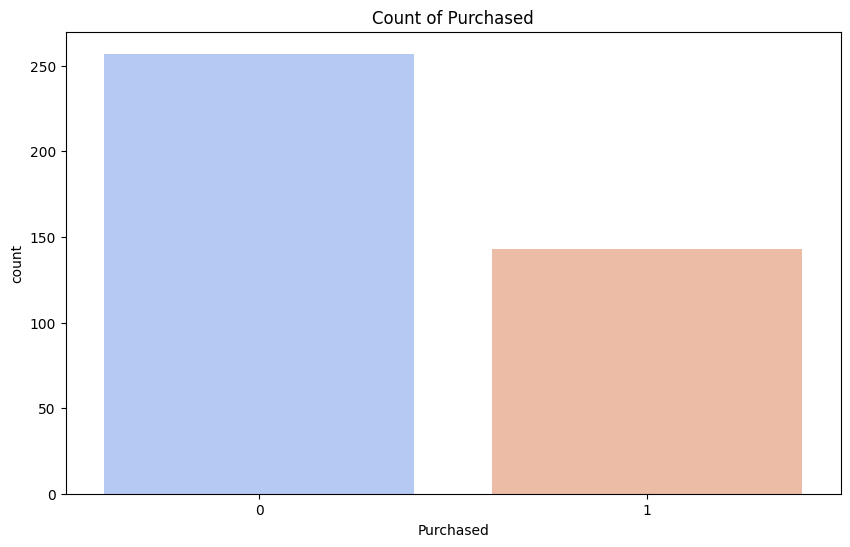

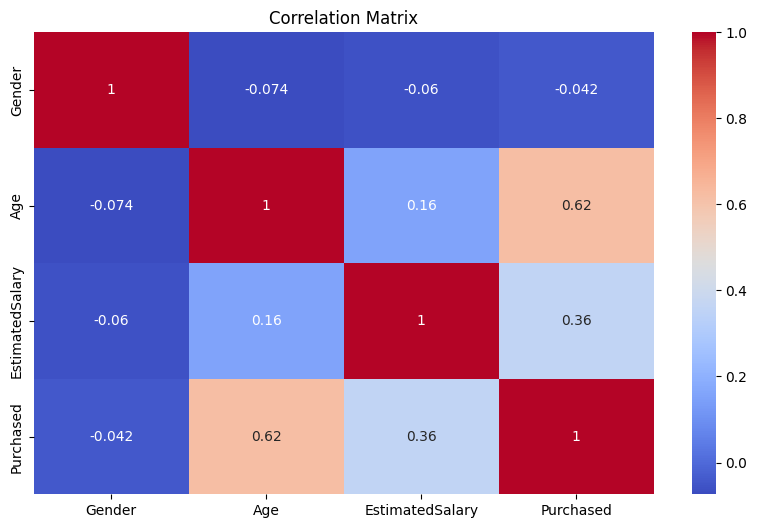

In [11]:

# Visualize the distribution of numerical features

# Age distribution
plt.figure(figsize=(10, 6))# Create a figure with size 10x6 Width and Height.
sns.histplot(df['Age'], kde=True, bins=30)# Create a histogram of the 'Age' column with a kernel density estimate.
plt.title('Distribution of Age')# Set the title of the plot
plt.xlabel('Age')# Set the x-axis label
plt.ylabel('Frequency')# Set the y-axis label
plt.show()# Display the plot

# EstimatedSalary distribution
plt.figure(figsize=(10, 6))# Create a figure with size 10x6 Width and Height.
sns.histplot(df['EstimatedSalary'], kde=True, bins=30)# Create a histogram of the 'EstimatedSalary' column with a kernel density estimate.
plt.title('Distribution of Estimated Salary')# Set the title of the plot
plt.xlabel('Estimated Salary')# Set the x-axis label
plt.ylabel('Frequency')# Set the y-axis label
plt.show()

# Box Plot of Age by Gender
plt.figure(figsize=(10, 6))# Create a figure with size 10x6 Width and Height.
sns.boxplot(x='Gender', y='Age', data=df)# Create a box plot of the 'Age' column
plt.title('Box Plot of Age by Gender')# Set the title of the plot
plt.show()# Display the plot

# Box Plot of Estimated Salary by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='EstimatedSalary', data=df)# Create a box plot of the 'EstimatedSalary' column
plt.title('Box Plot of Estimated Salary by Gender') 
plt.show()

# Visualize the relationship between features

# Pair Plot
label_encoder = LabelEncoder()# Initialize the LabelEncoder
df['User ID'] = label_encoder.fit_transform(df['User ID'])# Encode the 'User ID' column
df_withourt_user_id = df.drop('User ID', axis=1)# Drop the 'User ID' column

sns.pairplot(df_withourt_user_id, hue='Purchased', diag_kind='kde')# Create a pair plot of the dataframe with 'Purchased' as the hue
plt.show()

# Scatter Plot: Age vs Estimated Salary colored by Purchased
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df, palette='coolwarm')# Create a scatter plot of 'Age' vs 'EstimatedSalary' with 'Purchased' as the hue
plt.title('Age vs Estimated Salary colored by Purchased')
plt.show()

# Visualize the target variable distribution

# Count Plot of Purchased
plt.figure(figsize=(10, 6))
sns.countplot(x='Purchased', data=df, palette='coolwarm')
plt.title('Count of Purchased')
plt.show()

# Label encode 'Gender'
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Visualize the correlation between features
plt.figure(figsize=(10, 6))
correlation_matrix = df_withourt_user_id.corr()  # Use the entire DataFrame without the 'User ID' column
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Task 3:

### preprocessing the data:
#### Using Label Encoding to assigns a unique integer to each category 
#### (Male = 1, Female = 0)

In [219]:
# Encode the 'Gender' column using LabelEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,97,1,19,19000,0
1,392,1,35,20000,0
2,155,0,26,43000,0
3,64,0,27,57000,0
4,382,1,19,76000,0


# Task 4:
### Splitting the dataset into train, test, and validate dataset. 

In [220]:
# Purchased -> target
# User ID  User IDs do not carry patterns that can be used for prediction.
X = df.drop(columns=['User ID', 'Purchased'])
y = df['Purchased']



In [221]:
# Standardize the features before splitting the data
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)


#### Split the data into training (60%), validation (20%), and testing sets (20%)

In [222]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scale, y, test_size=0.4, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Task 5:
### Setting up the SVM model.

In [223]:
# Initialize the SVM model
model = SVC(random_state=1)

# Task 6:
### Training the SVM mode.

In [224]:
# Train the SVM model on the training data
model.fit(X_train, y_train)

SVC(random_state=1)

Validation Accuracy: % 93.75
Confusion Matrix:
[[52  3]
 [ 2 23]]


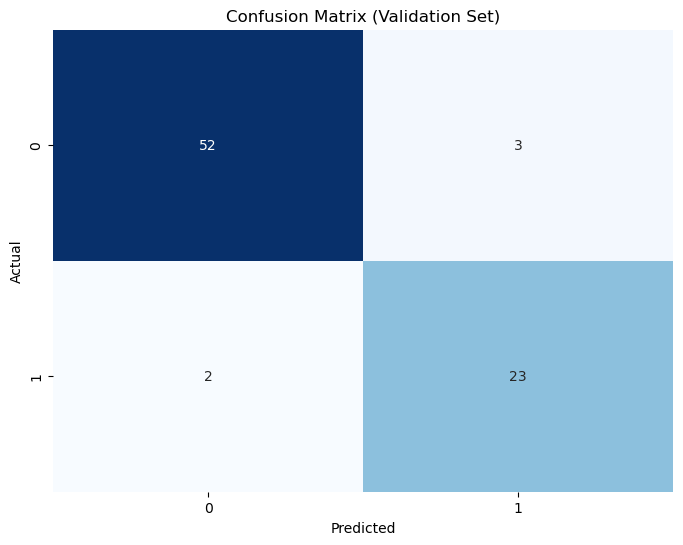

In [225]:


# Predict the labels for validation set

y_val_pred = model.predict(X_val)
# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy: %",accuracy * 100)
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Validation Set)")
plt.show()

In [226]:
class_report = classification_report(y_val, y_val_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95        55
           1       0.88      0.92      0.90        25

    accuracy                           0.94        80
   macro avg       0.92      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



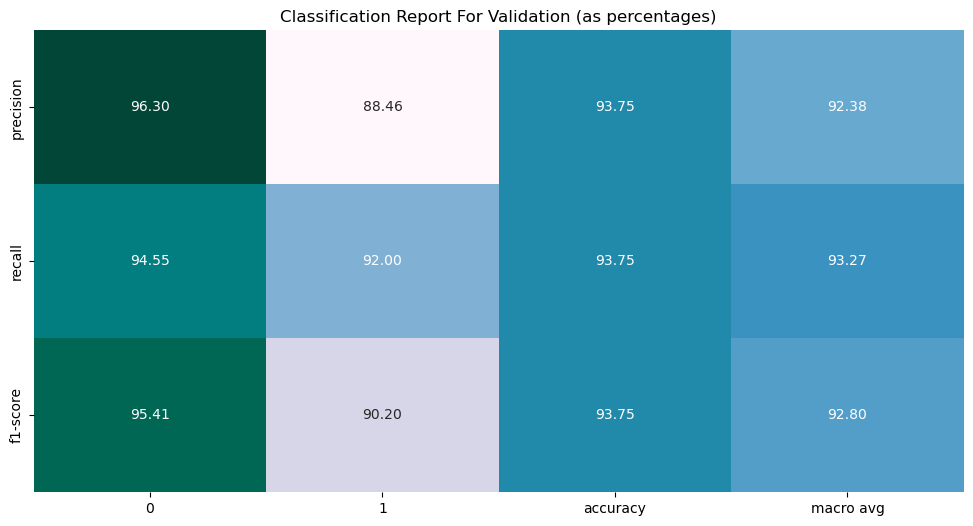

In [227]:
class_report = classification_report(y_val, y_val_pred, output_dict=True)
df_class_report = pd.DataFrame(class_report).transpose()

# Convert the relevant values to percentages
df_class_report.iloc[:-1, :-1] = df_class_report.iloc[:-1, :-1] * 100

plt.figure(figsize=(12, 6))
sns.heatmap(df_class_report.iloc[:-1, :-1].T, annot=True, fmt=".2f", cmap="PuBuGn", cbar=False)
plt.title("Classification Report For Validation (as percentages)")
plt.show()

In [228]:
y_pred = model.predict(X_test)

Confusion Matrix:
[[40  5]
 [ 2 33]]


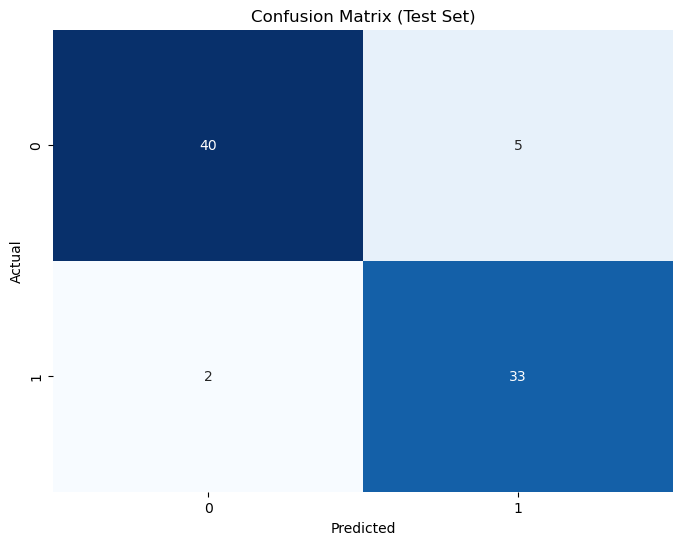

In [229]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix (Test Set)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [230]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9125


In [231]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92        45
           1       0.87      0.94      0.90        35

    accuracy                           0.91        80
   macro avg       0.91      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



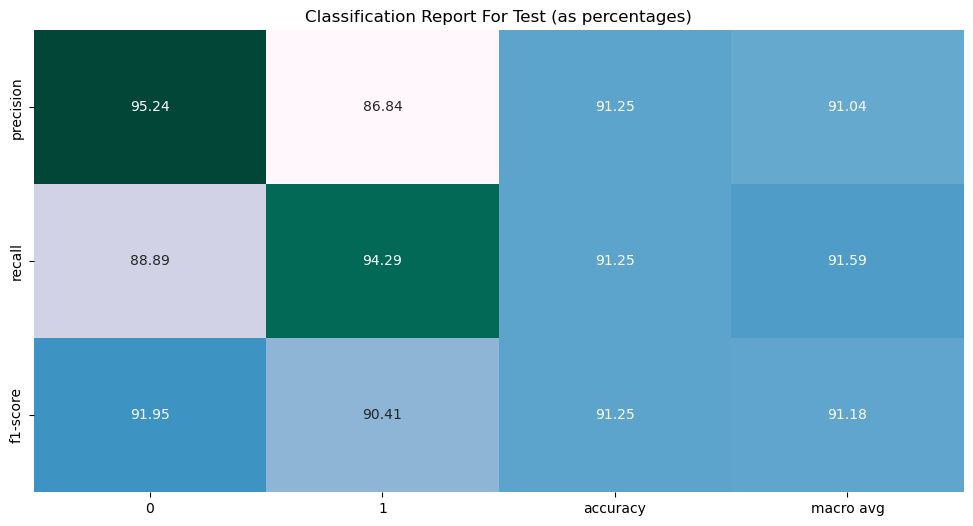

In [232]:
class_report = classification_report(y_test, y_pred, output_dict=True)
df_class_report = pd.DataFrame(class_report).transpose()

# Convert the relevant values to percentages
df_class_report.iloc[:-1, :-1] = df_class_report.iloc[:-1, :-1] * 100

plt.figure(figsize=(12, 6))
sns.heatmap(df_class_report.iloc[:-1, :-1].T, annot=True, fmt=".2f", cmap="PuBuGn", cbar=False)
plt.title("Classification Report For Test (as percentages)")
plt.show()

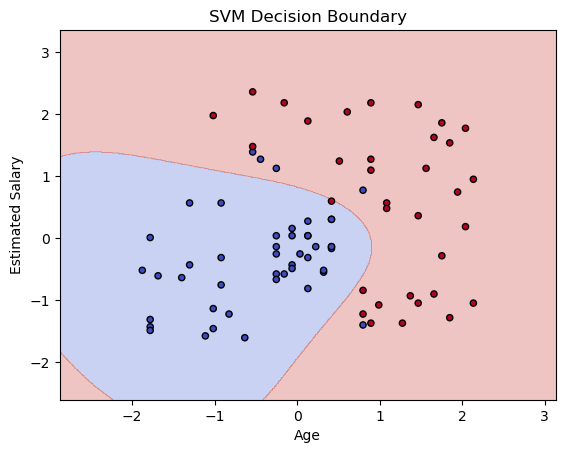

In [233]:
def plot_svm_decision_boundary(X, y, model):
    # Reduce to two features for visualization
    X = X[:, 1:3]  # Assuming Age and EstimatedSalary are the second and third columns

    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Predict the function value for the whole grid
    Z = model.predict(np.c_[np.zeros(xx.ravel().shape[0]), xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap='coolwarm')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.title('SVM Decision Boundary')
    plt.show()

# Plot the SVM decision boundary using only Age and Estimated Salary on the test set
X_test_plot = X_test.copy()
X_test_plot[:, 0] = 0  # Zero out the Gender column for visualization
plot_svm_decision_boundary(X_test_plot, y_test, model)
